# Aula 1 - Introdução e análises iniciais


In [0]:
import pandas as pd

In [2]:
movie_dataset = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
movie_dataset.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_dataset = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
ratings_dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings_dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [5]:
  ratings_dataset['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [6]:
ratings_dataset['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [7]:
ratings_by_movie = ratings_dataset.groupby('movieId')['rating'].mean()
ratings_by_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [8]:
movies_rated = movie_dataset.join(ratings_by_movie, on='movieId')
movies_rated

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [9]:
movies_rated.sort_values('rating', ascending=False)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


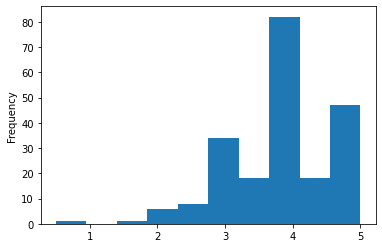

In [10]:
ratings_dataset.query('movieId == 1')['rating'].plot(kind='hist')

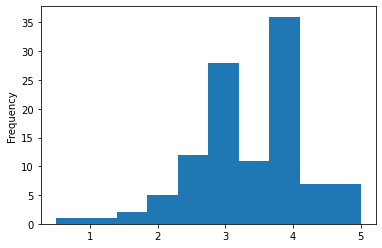

In [11]:
ratings_dataset.query('movieId == 2')['rating'].plot(kind='hist')

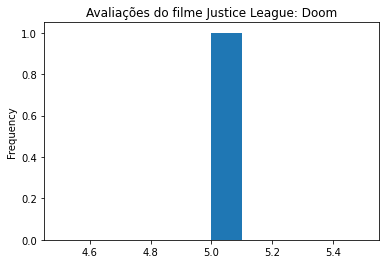

In [12]:
import matplotlib.pyplot as plt

ratings_dataset.query('movieId == 102084')['rating'].plot(kind='hist')
plt.title('Avaliações do filme Justice League: Doom')
plt.show()

In [13]:
movies_rated.query('movieId == 102084')

,movieId,title,genres,rating
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0


# Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [14]:
movies_rated[movies_rated['rating'].isnull()]

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2 do Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [15]:
movies_rated = movies_rated.rename(columns={"rating" : "average_rating"})
movies_rated.head()

,movieId,title,genres,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3 do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [16]:
ratings_count = pd.Series(ratings_dataset.groupby('movieId')['rating'].count())
movies = movies_rated.join(ratings_count, on='movieId')
movies.columns = ['movieId', 'title', 'genres', 'average_rating', 'rating_count']
movies.head()

,movieId,title,genres,average_rating,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4 do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [17]:
movies['average_rating'] = movies['average_rating'].round(2)
movies.head()

,movieId,title,genres,average_rating,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


# Desafio 5 do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). 

In [18]:
genres_string = movies['genres'].str.cat(sep='|')
genres_list = genres_string.split(sep='|')
genres_series = pd.Series( (str for str in genres_list) )
genres = genres_series.unique()
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

# Desafio 6 da Thais André

Contar o número de aparições de cada genero.

In [19]:
genres_series = pd.Series( (str for str in genres_list) )
genres_appearences = pd.DataFrame({ 'genre': genres_series.unique(), 'appearences': genres_series.value_counts().values })
genres_appearences

,genre,appearences
0,Adventure,4361
1,Animation,3756
2,Children,1894
3,Comedy,1828
4,Fantasy,1596
5,Romance,1263
6,Drama,1199
7,Action,980
8,Crime,978
9,Thriller,779


# Desafio 7 do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

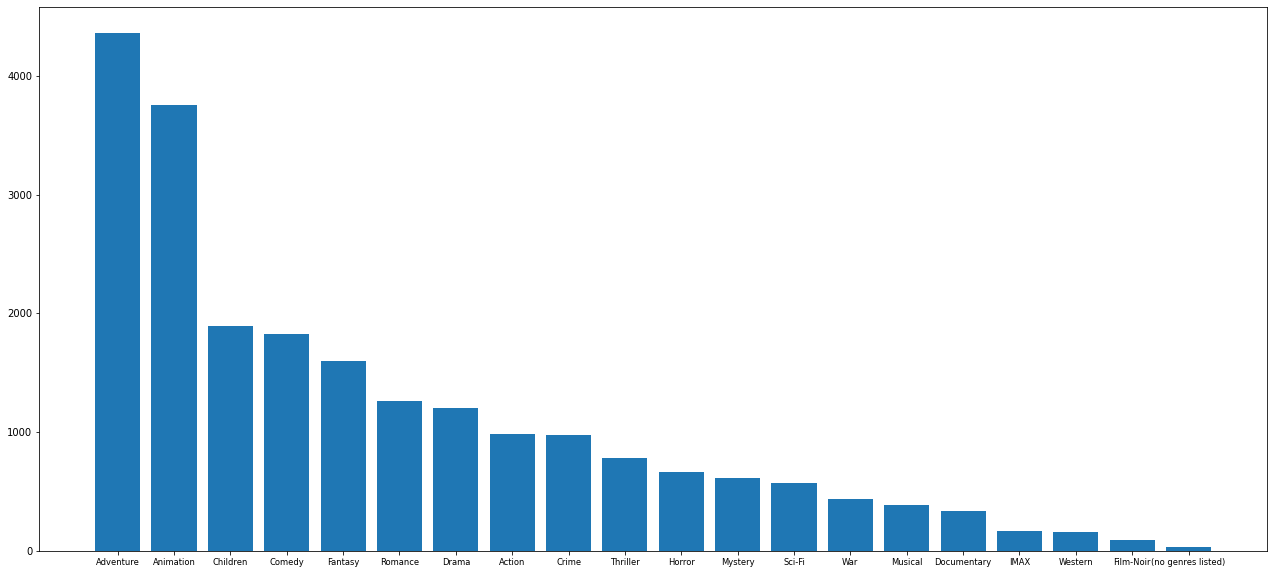

In [20]:
genres_series = pd.Series( (str for str in genres_list) )
genres_df = pd.DataFrame({ 'genre': genres_series })

plt.figure(figsize=(22,10))
plt.bar(range(len(genres_df['genre'].unique())), genres_df['genre'].value_counts(), align='center')
plt.xticks(range(len(genres_df['genre'].unique())), genres_df['genre'].unique(), size='small')
plt.show()

# AULA 02 - Análise de Média e Mediana // Visualização de Dados


Outra resolução para pegar quantidade de filmes de um gênero


In [21]:
movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Outra resolução para o histograma

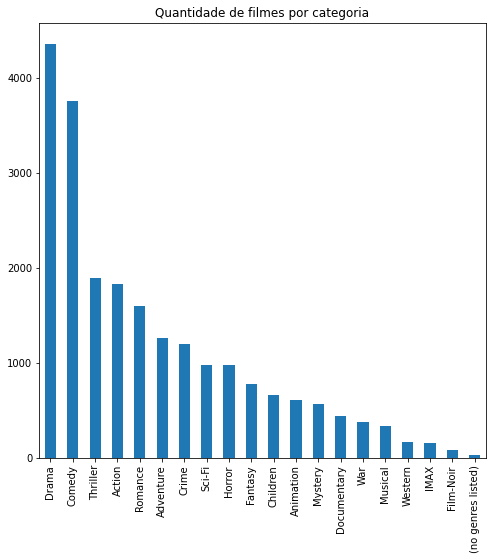

In [22]:
movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(8,8), 
    title='Quantidade de filmes por categoria'
)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


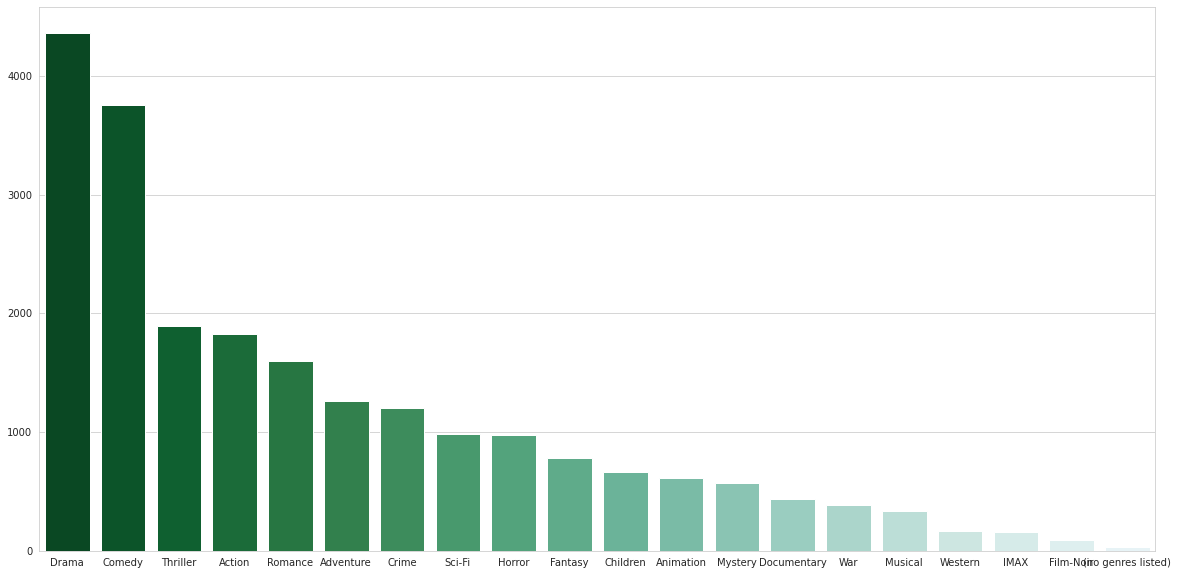

In [23]:
#Visualização pelo seaborn
import seaborn as sns

movies_by_genre = movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.barplot(x = movies_by_genre.index, y = movies_by_genre.values, palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre.index) + 2))

plt.show()

Verificando distribuição de notas de um filme

In [0]:
def plot_movie(id):
  ratings = ratings_dataset.query(f"movieId == {id}")['rating']
  ratings.plot(kind='hist')
  return ratings.describe()
  

count    21.000000
mean      2.880952
std       0.998809
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: rating, dtype: float64

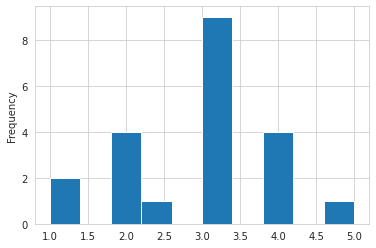

In [25]:
plot_movie(707)

Utilização do boxplot para verificar distribuição das notas e interferência de outliers

In [0]:
def plot_movie_boxplot(id):
  ratings = ratings_dataset.query(f"movieId == {id}")['rating']
  ratings.plot(kind='hist')
  plt.show()
  ratings.plot.box()
  plt.show()
  return ratings.describe()
    

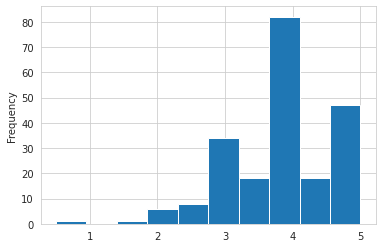

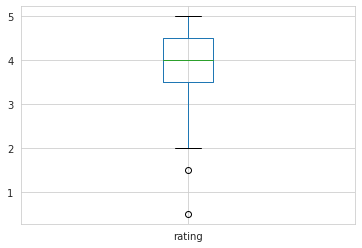

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [27]:
plot_movie_boxplot(1)

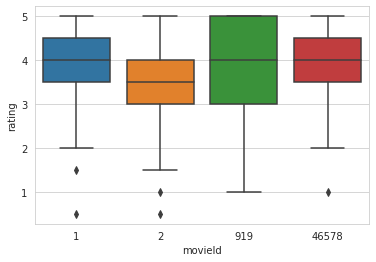

In [28]:
# diferenças entre boxplot do seaborn e do pandas

sns.boxplot(data = ratings_dataset.query("movieId in [1, 2, 919, 46578]"), x='movieId', y='rating')

# Desafio 1  do Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

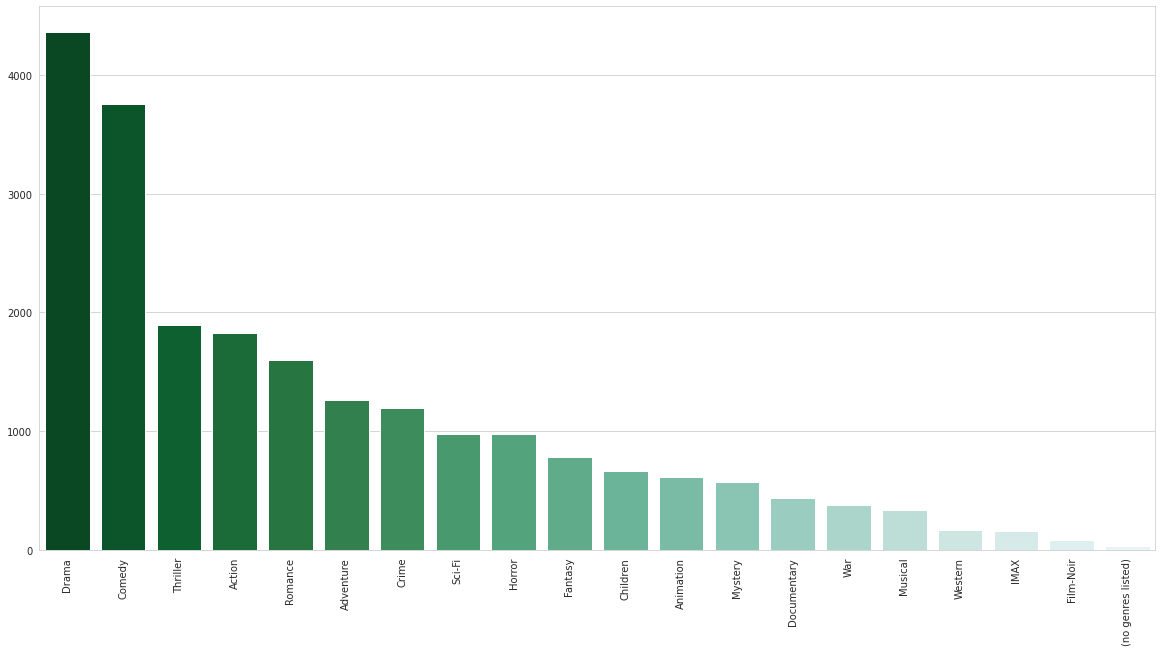

In [29]:
#Visualização pelo seaborn
import seaborn as sns

movies_by_genre = movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.barplot(x = movies_by_genre.index, y = movies_by_genre.values, palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre.index) + 2))

plt.xticks(rotation=90)
plt.show()

# Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

Serão utilizados os 5 primeiros filmes com médias mais próximas a 3. 

In [30]:
selected_movies = movies_rated.query("average_rating > 3").sort_values(by=['average_rating']).head()
selected_movies

,movieId,title,genres,average_rating
1333,1805,Wild Things (1998),Crime|Drama|Mystery|Thriller,3.016129
784,1027,Robin Hood: Prince of Thieves (1991),Adventure|Drama,3.017857
1987,2641,Superman II (1980),Action|Sci-Fi,3.020408
1325,1792,U.S. Marshals (1998),Action|Crime|Thriller,3.021739
1780,2378,Police Academy (1984),Comedy|Crime,3.022727


1333    Movie: Wild Things (1998)
Name: title, dtype: object


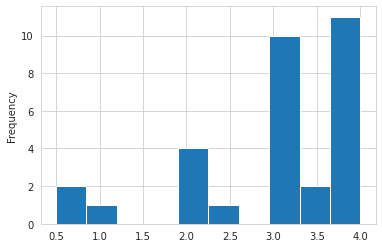

784    Movie: Robin Hood: Prince of Thieves (1991)
Name: title, dtype: object


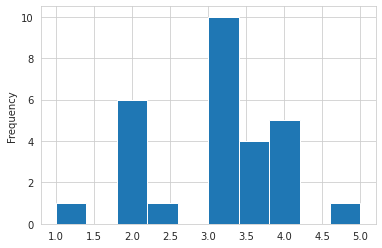

1987    Movie: Superman II (1980)
Name: title, dtype: object


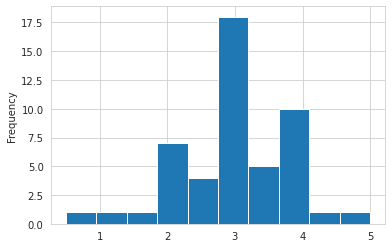

1325    Movie: U.S. Marshals (1998)
Name: title, dtype: object


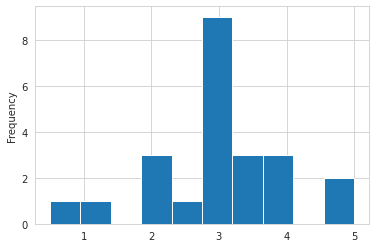

1780    Movie: Police Academy (1984)
Name: title, dtype: object


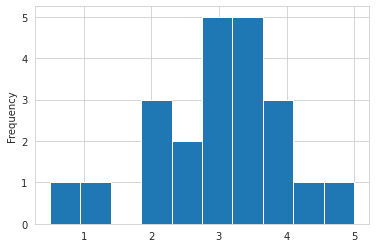

In [31]:
for movie in selected_movies.movieId:
  print('Movie: '+ movies_rated.query(f"movieId == {movie}")['title'])
  plot_movie(movie)
  plt.show()

# Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [32]:
movies.dropna().sort_values(by=['rating_count'], ascending=False).head(10)


,movieId,title,genres,average_rating,rating_count
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


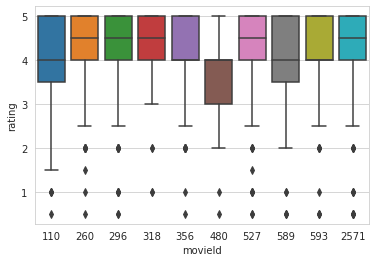

In [33]:
movies_list = movies.dropna().sort_values(by=['rating_count'], ascending=False)['movieId'].head(10)
sns.boxplot(data = ratings_dataset.query(f"movieId in {movies_list.values.tolist()}"), x='movieId', y='rating')

O que podemos observar desses boxplots:
* As médias estão mais próximas da demarcação do primeiro quartil, em geral, do que das medianas em filmes com separação de quartil quase igualitária, por conta dos outliers. 
* Mesmo com outliers abaixo do limitante inferior, os filmes com terceiro quartil mais amplo, possuem médias próximas à mediana, exceto quando primeiro quartil tem amplitude baixa.

# Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

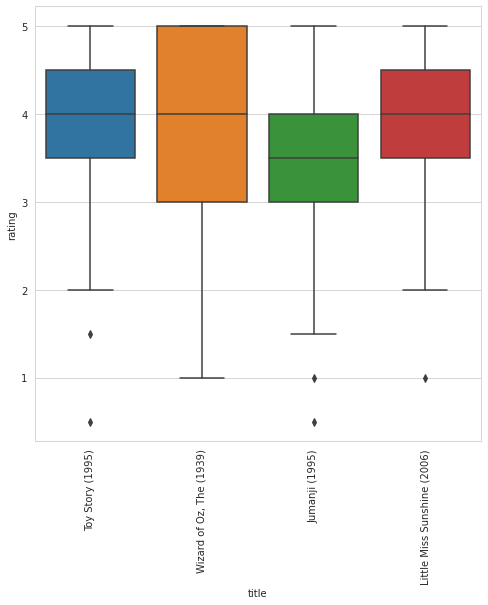

In [34]:
movieIds = movie_dataset.loc[:, ['movieId', 'title']]
rated_movie_titles = ratings_dataset.merge(movieIds, on='movieId', how='right')

plt.figure(figsize=(8,8))
plt.xticks(rotation=90) 
sns.boxplot(
    data = rated_movie_titles.query("movieId in [1, 2, 919, 46578]"),
    x='title',
    y='rating'
)
plt.show()

# Desafio 5 do Allan Spadini
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
worst_selected_movie = movies_rated.sort_values(by=['average_rating']).head(1)
avg_selected_movie = movies_rated.query("average_rating >= 3").sort_values(by=['average_rating']).head(1)
best_selected_movie = movies_rated.sort_values(by=['average_rating'], ascending=False).head(1)

In [36]:
ratings_dataset.query(f"movieId == {best_selected_movie.movieId.values[0]}")

,userId,movieId,rating,timestamp
77875,483,88448,5.0,1315437602


In [37]:
print(ratings_dataset.query(f"movieId == {avg_selected_movie.movieId.values[0]}")['rating'].describe())
print('mode: ', ratings_dataset.query(f"movieId == {avg_selected_movie.movieId.values[0]}")['rating'].mode())

count    3.00
mean     3.00
std      0.50
min      2.50
25%      2.75
50%      3.00
75%      3.25
max      3.50
Name: rating, dtype: float64
mode:  0    2.5
1    3.0
2    3.5
dtype: float64


In [38]:
print(ratings_dataset.query(f"movieId == {worst_selected_movie.movieId.values[0]}")['rating'].describe())
print('mode: ', ratings_dataset.query(f"movieId == {worst_selected_movie.movieId.values[0]}")['rating'].mode())

count    1.0
mean     0.5
std      NaN
min      0.5
25%      0.5
50%      0.5
75%      0.5
max      0.5
Name: rating, dtype: float64
mode:  0    0.5
dtype: float64


Foi possível observar que os filmes com notas extremas, possuem elas por causa da escassez de avaliações

# Desafio 6 da Thais André
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

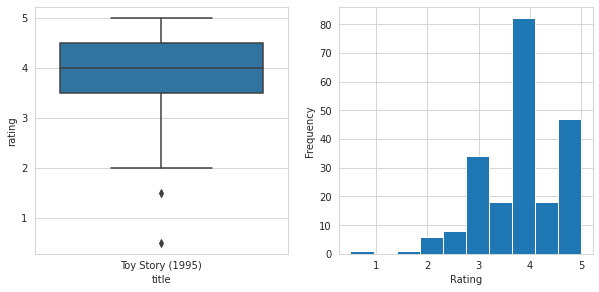

In [39]:


plt.subplots(figsize=(10,10), nrows=1, ncols=2)
plt.xticks(rotation=90)
plt.subplot(2,2,1) 
sns.boxplot(
    data = rated_movie_titles.query("movieId == 1"),
    x='title',
    y='rating'
)

plt.subplot(2,2,2)
plt.xlabel('Rating')
ratings = ratings_dataset.query(f"movieId == 1")['rating']
ratings.plot(kind='hist')

plt.show()

# Desafio 7 do Thiago Gonçalves
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

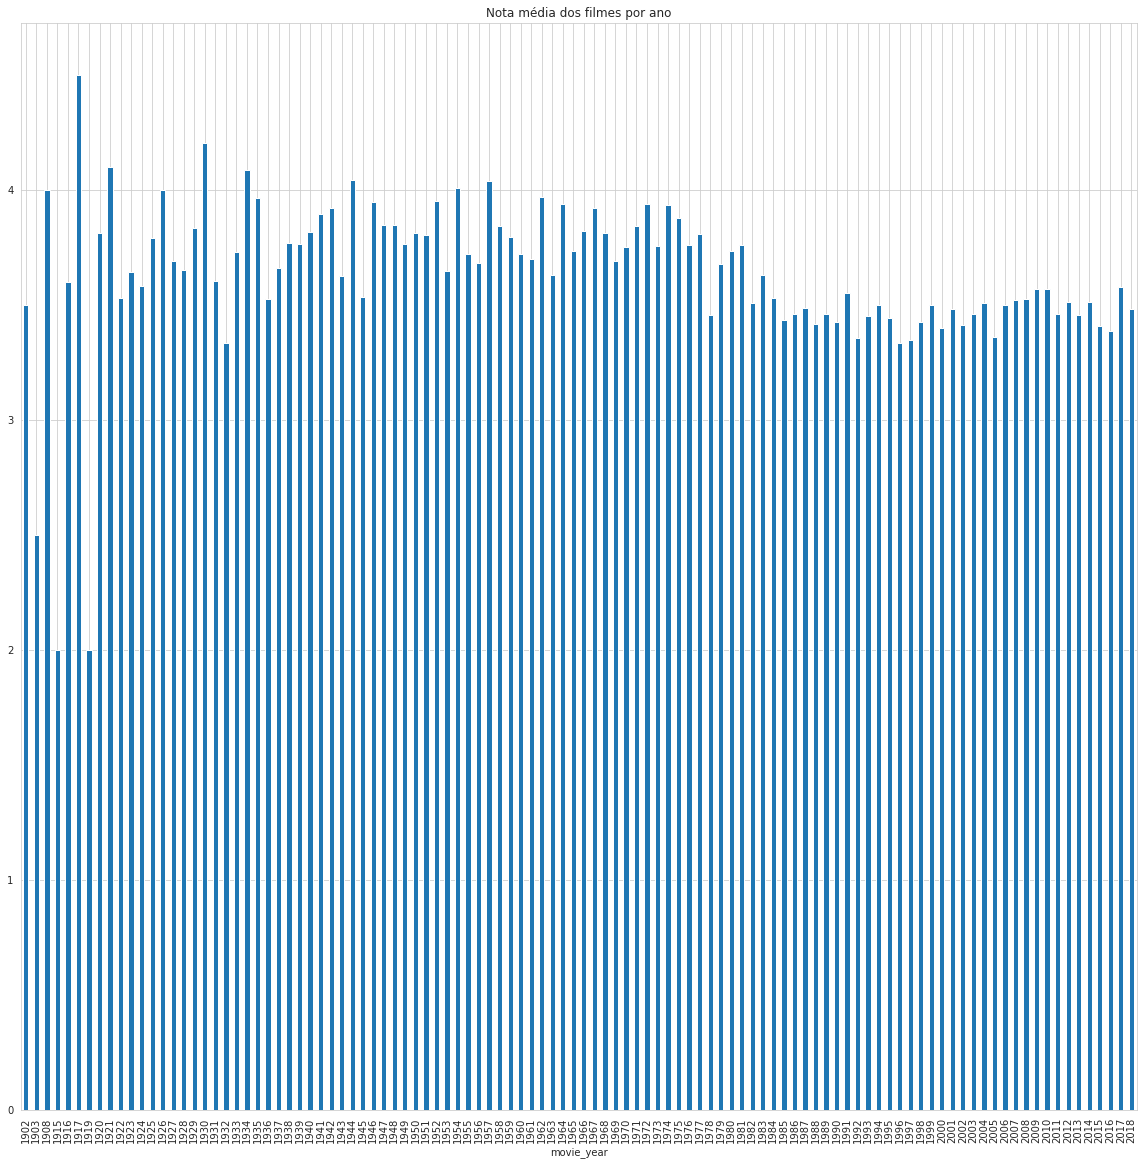

In [40]:
rated_movie_titles = rated_movie_titles.dropna()
dates = []
for value in rated_movie_titles['title']:
  year = value.rsplit('(')[len(value.rsplit('('))-1][0:4]    
  dates.append(year)
rated_movie_titles['movie_year'] = dates

movies_only = rated_movie_titles[rated_movie_titles[['movie_year']].apply(lambda x: x[0].isdigit(), axis=1)]
movies_only.groupby('movie_year')['rating'].mean().plot(
    kind='bar', 
    figsize=(20,20), 
    title='Nota média dos filmes por ano'
)
plt.show()

# AULA 03 - Correlações e Explorações de Dados

In [41]:
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [42]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [43]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [44]:
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [45]:
imdb['director_name'].value_counts()

Steven Spielberg      26
Woody Allen           22
Clint Eastwood        20
Martin Scorsese       20
Ridley Scott          17
                      ..
Mark Tonderai          1
Stephen Kijak          1
Hans Petter Moland     1
Nicholas Jarecki       1
Stéphane Aubier        1
Name: director_name, Length: 2398, dtype: int64

In [46]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

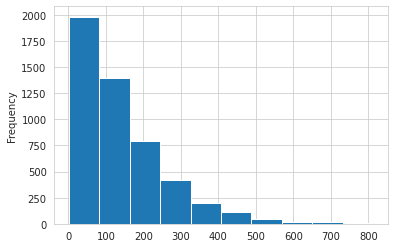

In [47]:
imdb['num_critic_for_reviews'].plot(kind='hist')

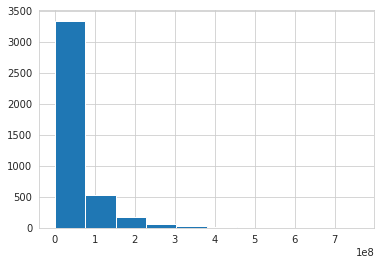

In [48]:
imdb['gross'].hist()

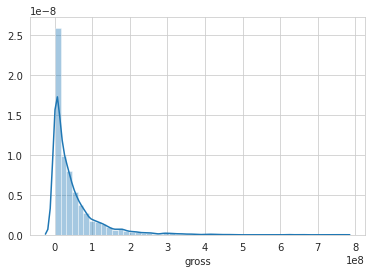

In [49]:
sns.distplot(imdb['gross'])

In [50]:
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1851,Color,Lawrence Kasdan,46.0,133.0,759.0,67.0,Todd Allen,826.0,33200000.0,Action|Crime|Drama|Western,Scott Glenn,Silverado,28247,1154,Brad Leland,4.0,1880s|kiss|small town|table broken in fight|wi...,http://www.imdb.com/title/tt0090022/?ref_=fn_t...,149.0,English,USA,PG-13,26000000.0,1985.0,130.0,7.2,2.35,0
4504,Color,Laurent Bouhnik,9.0,103.0,0.0,24.0,Johnny Amaro,34.0,NaN,Drama,Déborah Révy,Q,4068,114,Yassine Azzouz,1.0,female explicit nudity|hand job|oral sex|penet...,http://www.imdb.com/title/tt1879030/?ref_=fn_t...,16.0,French,France,NaN,1500000.0,2011.0,29.0,5.6,1.78,754
4408,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,Honglei Sun,"A Woman, a Gun and a Noodle Shop",2410,18,Dahong Ni,1.0,betrayal|husband wife relationship|murder|nood...,http://www.imdb.com/title/tt1428556/?ref_=fn_t...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
3845,Color,John Huston,42.0,115.0,1000.0,68.0,Richard Basehart,232.0,NaN,Adventure|Drama,Royal Dano,Moby Dick,13474,588,James Robertson Justice,0.0,obsession|revenge|ship|whale|whaling,http://www.imdb.com/title/tt0049513/?ref_=fn_t...,115.0,English,USA,Unrated,4500000.0,1956.0,169.0,7.4,1.66,0
1849,Color,Paul Weitz,157.0,109.0,80.0,2000.0,Ty Burrell,19000.0,45489752.0,Comedy|Drama|Romance,Scarlett Johansson,In Good Company,48973,28493,Dennis Quaid,2.0,company|corporate takeover|executive|magazine|...,http://www.imdb.com/title/tt0385267/?ref_=fn_t...,214.0,English,USA,PG-13,26000000.0,2004.0,3000.0,6.5,1.85,736
1787,Color,John Carpenter,156.0,98.0,0.0,900.0,Clea DuVall,26000.0,8434601.0,Action|Horror|Sci-Fi,Jason Statham,Ghosts of Mars,43006,28867,Natasha Henstridge,5.0,head on a stake|machine gun|martian|nuclear re...,http://www.imdb.com/title/tt0228333/?ref_=fn_t...,460.0,English,USA,R,28000000.0,2001.0,1000.0,4.9,2.35,0
3942,Color,Kevin Allen,33.0,86.0,8.0,428.0,Frances Fisher,759.0,185577.0,Comedy,Craig Ferguson,The Big Tease,2133,2805,Mary McCormack,1.0,competition|fake documentary|hairdresser|nudit...,http://www.imdb.com/title/tt0156639/?ref_=fn_t...,31.0,English,UK,R,4000000.0,1999.0,638.0,6.3,1.85,182
456,Color,Adam Shankman,144.0,99.0,163.0,495.0,Carmen Electra,11000.0,109993847.0,Comedy|Family|Fantasy|Romance,Adam Sandler,Bedtime Stories,72326,12831,Kathryn Joosten,0.0,2000s|bedtime story|elephant|handyman|tween girl,http://www.imdb.com/title/tt0960731/?ref_=fn_t...,116.0,English,USA,PG,80000000.0,2008.0,869.0,6.1,2.35,0
2343,Color,Julie Taymor,92.0,110.0,278.0,181.0,Reeve Carney,3000.0,263365.0,Comedy|Drama|Fantasy|Romance,Djimon Hounsou,The Tempest,6147,3785,Tom Conti,2.0,banishment|sorcery|spirit|staff|storm at sea,http://www.imdb.com/title/tt1274300/?ref_=fn_t...,36.0,English,USA,PG-13,20000000.0,2010.0,602.0,5.4,2.35,0
1483,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14998070.0,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,32875,Andrew Garfield,3.0,afghanistan|professor|reporter|student|university,http://www.imdb.com/title/tt0891527/?ref_=fn_t...,298.0,English,USA,R,35000000.0,2007.0,10000.0,6.2,2.35,0


Aplicações de correlação para procurar relações entre variáveis

In [51]:
color_non_null = imdb.query("color in [' Black and White', 'Color']")
color_non_null['color_binary'] = (color_non_null['color'] == 'Color') * 1
color_non_null.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_binary
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [52]:
color_non_null['color_binary'].value_counts()

1    4815
0     209
Name: color_binary, dtype: int64

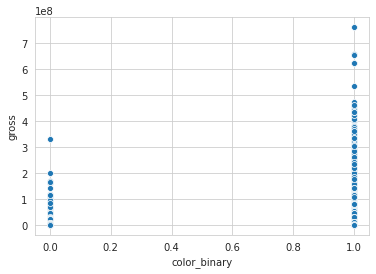

In [53]:
sns.scatterplot(data=color_non_null, x='color_binary', y='gross')

In [54]:
color_non_null.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [55]:
color_non_null.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [56]:
color_non_null.groupby('color').median()['imdb_score']

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

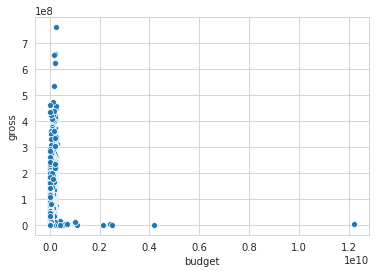

In [57]:
budget_gross = imdb[['budget', 'gross']].dropna().query("budget > 0  and gross > 0")

sns.scatterplot(x='budget', y='gross', data=budget_gross)

In [58]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [59]:
# problema de currency, filtrar por pais
imdb['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [60]:
usa_movies = imdb.query("country == 'USA'")
usa_movies.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


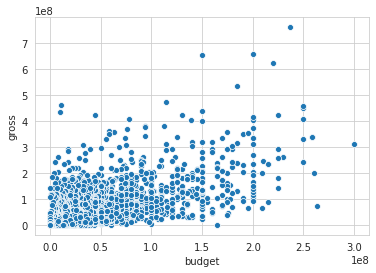

In [61]:
imdb = imdb.drop_duplicates()
usa_movies = imdb.query("country == 'USA'")

budget_gross = usa_movies[['budget', 'gross']].dropna().query("budget > 0  and gross > 0")

sns.scatterplot(x='budget', y='gross', data=budget_gross)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


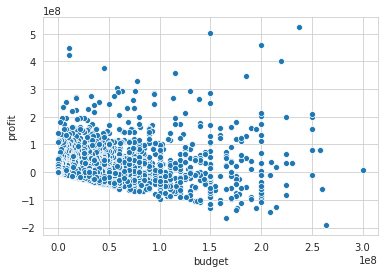

In [62]:
# lucro/prejuizo
# Feature Engineering = criação de features a partir das existentes para facilitar análise
usa_movies['profit'] = usa_movies['gross'] - usa_movies['budget']

budget_profit = usa_movies.query("budget > 0  and gross > 0")[['profit', 'budget']].dropna()

sns.scatterplot(x='budget', y='profit', data=budget_profit)


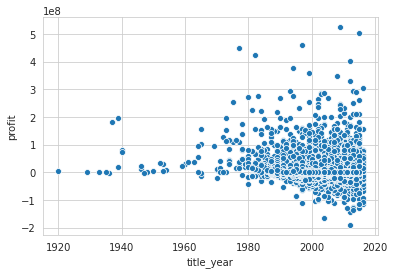

In [63]:
profit_per_year = usa_movies.query("budget > 0  and gross > 0")[['title_year', 'profit']].dropna()

sns.scatterplot(x='title_year', y='profit', data=profit_per_year)

In [64]:
movies_per_director = usa_movies['director_name'].value_counts()
gross_per_director = usa_movies[['director_name', 'gross']].set_index('director_name').join(movies_per_director, on='director_name').dropna()
gross_per_director.columns=['total_earned', 'movies_quantity']
gross_per_director.head()

,total_earned,movies_quantity
director_name,,
James Cameron,760505847.0,6.0
Gore Verbinski,309404152.0,7.0
Christopher Nolan,448130642.0,8.0
Andrew Stanton,73058679.0,3.0
Sam Raimi,336530303.0,11.0


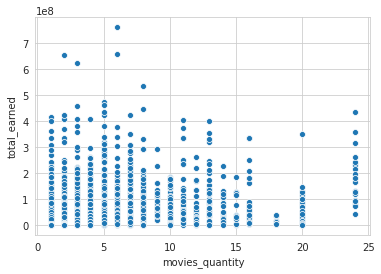

In [65]:
sns.scatterplot(x='movies_quantity', y='total_earned', data=gross_per_director)

Esse gráfico mostra que não é necessariamente a quantidade de filmes feitos que implica em maior receita adquirida por um diretor. 

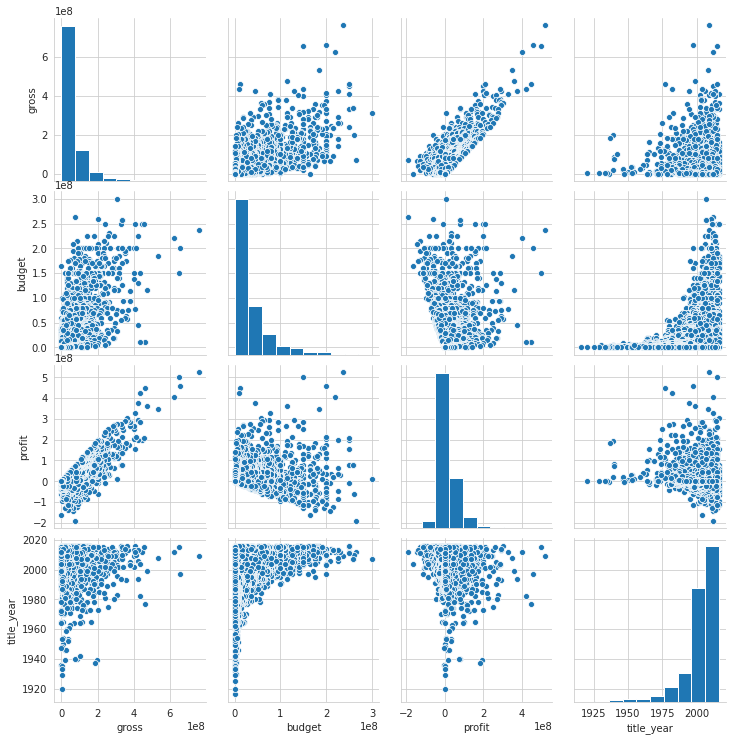

In [66]:
sns.pairplot(data=usa_movies[['gross', 'budget', 'profit', 'title_year']])

In [67]:
usa_movies[['gross', 'budget', 'profit', 'title_year']].corr()

,gross,budget,profit,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
profit,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


# Desafio 1 do Thiago Gonçalves
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

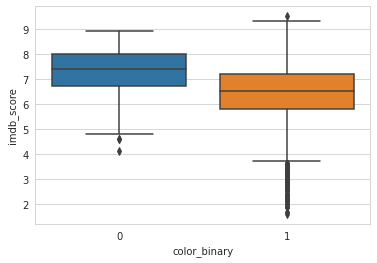

In [68]:
sns.boxplot(data = color_non_null, x='color_binary', y='imdb_score')

Lembrando que 1 representa filmes coloridos e 0 representa filmes preto e branco. Diante do boxplot, podemos inferir que:
* Filmes preto e branco possuem maior quantidade de notas dentro dos quartis e dos limitantes, e apenas tem outliers de notas inferiores. Isso denota que, além do fato de estarem constando menos filmes preto e branco na base, a avliação deles é mais concentrada no intervalo de quartis, e, provavelmente, isto é consequência daquilo.
* Os filmes coloridos possuem uma quantidade maior de outliers abaixo do limite inferior do boxplot, sendo isto consequência de maior incidência de avaliações, mas também, de uma queda de qualidade de filmes diante da ótica dos avaliadores da plataforma. Mesmo assim, os filmes coloridos possuem limitante superior maior que os filmes preto e branco e possuem outliers maiores que o limitante superior, indicando que existem filmes coloridos que, segundo os avaliadores da plataforma, são melhores que os filmes preto e branco.

# Desafio 2 do Guilherme Silveira
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [69]:
usa_movies.sort_values('profit').head(1)[['movie_title', 'profit']]

,movie_title,profit
5,John Carter,-190641321.0


Como Paulo já havia imaginado, John Carter foi o filme estadunidense de maior prejuízo.

# Desafio 3 do Guilherme Silveira
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

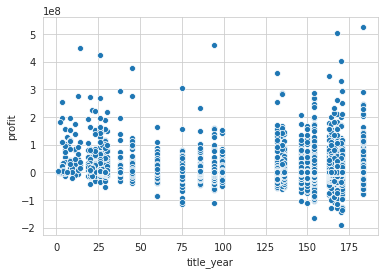

In [70]:
movies_year = usa_movies["title_year"].value_counts()
profit_year = usa_movies[["title_year", "profit"]].set_index("title_year").join(movies_year, on="title_year")
profit_year.columns = ["profit", "title_year"]
sns.scatterplot(x="title_year", y="profit", data = profit_year)

In [71]:
profit_per_year = usa_movies.query("budget > 0  and gross > 0")[['title_year', 'profit']].dropna()
profit_per_year.sort_values('title_year', ascending=False).head(1)

,title_year,profit
163,2016.0,-108858926.0


Os filmes mais recentes na base são de 2016. Portanto, analisaremos o lucro das produções desse ano, através de um boxplot.

Mediana do lucro no ano:  5566327.0


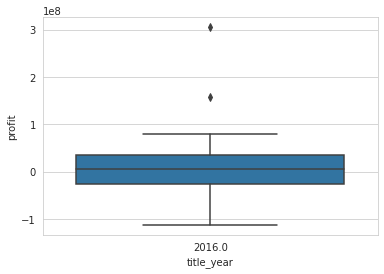

In [72]:
sns.boxplot(data = profit_per_year.query("title_year == 2016"), x='title_year', y='profit')
print('Mediana do lucro no ano: ', profit_per_year.query("title_year == 2016")['profit'].median())

Tal gráfico foi inconclusivo pois a mediana foi positiva, apesar de grande parte do primeiro quartil indicar prejuízo. Faremos a comparação com os 3 anos anteriores, considerando que não houveram eventos históricos relevantes que prejudicaram diretamente o faturamento da indústria do cinema.

Mediana do lucro em 2013:  5114507.0
Mediana do lucro em 2014:  9305483.5
Mediana do lucro em 2015:  10474107.0


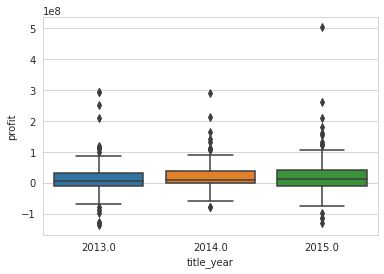

In [73]:
sns.boxplot(data = profit_per_year.query("title_year in [2013, 2014, 2015]"), x='title_year', y='profit')
print('Mediana do lucro em 2013: ', profit_per_year.query("title_year == 2013")['profit'].median())
print('Mediana do lucro em 2014: ', profit_per_year.query("title_year == 2014")['profit'].median())
print('Mediana do lucro em 2015: ', profit_per_year.query("title_year == 2015")['profit'].median())


Pela análise dos anos anteriores e mediana obtida, não é possível obter conclusão. Portanto, não é possível sustentar a hipótese de filmes mais recentes estarem em prejuízo por ter lançamento recente.

# Desafio 4 do Paulo Silveira
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

Primeiramente, será observado o limitante pré-segunda guerra mundial.

In [74]:
usa_movies.query("budget > 0  and gross > 0 and title_year < 1945").dropna().sort_values('title_year', ascending=False)['title_year'].head(1)

1143    1940.0
Name: title_year, dtype: float64

In [75]:
pre_ww2_usa_movies = usa_movies.query("budget > 0  and gross > 0 and title_year <= 1940").dropna()
pre_ww2_usa_movies.sort_values('profit', ascending=False)[['genres', 'movie_title', 'title_year', 'profit']]

,genres,movie_title,title_year,profit
3970,Drama|History|Romance|War,Gone with the Wind,1939.0,194678278.0
4449,Animation|Family|Fantasy|Musical,Snow White and the Seven Dwarfs,1937.0,182925485.0
1143,Animation|Family|Fantasy|Musical,Pinocchio,1940.0,81700000.0
4157,Adventure|Family|Fantasy|Musical,The Wizard of Oz,1939.0,19402612.0
4812,Musical|Romance,The Broadway Melody,1929.0,2429000.0
4706,Comedy|Musical|Romance,Top Hat,1935.0,2391000.0
4786,Comedy|Musical|Romance,42nd Street,1933.0,1861000.0
4427,Comedy|Drama|Family,Modern Times,1936.0,-1336755.0


# Desafio 5 do Paulo Silveira
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [76]:
gross_per_director.query("movies_quantity > 16 and movies_quantity < 20")

,total_earned,movies_quantity
director_name,,
Woody Allen,7496522.0,18.0
Woody Allen,16684352.0,18.0
Woody Allen,13383737.0,18.0
Woody Allen,10569071.0,18.0
Woody Allen,9714482.0,18.0
Woody Allen,33404871.0,18.0
Woody Allen,17071230.0,18.0
Woody Allen,3203044.0,18.0
Woody Allen,14792779.0,18.0


Confirma-se a tese de que os filmes do Woody Allen são um só, pois são parecidos até em faturamento. Paulo e Guilherme estavam certos...

# Desafio 6 do Thiago Gonçalves
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

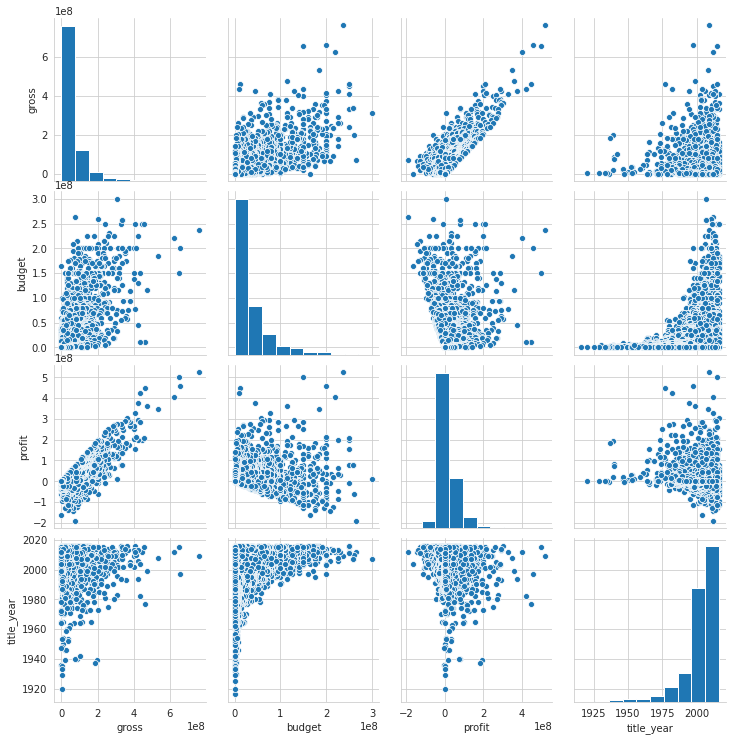

In [77]:
sns.pairplot(data=usa_movies[['gross', 'budget', 'profit', 'title_year']])

* Na diagonal da relação, observa-se o histograma da distribuição de valores de cada atributo;
* Podemos observar que o dinheiro investido em filmes veio aumentando ao longo do tempo, provavelmente por inflação ou inovação de técnicas. Principalmente, a partir dos anos 60. O fenômeno se repete quando é vista a relação de ganhos pelos filmes ao longo dos anos;
* Não é possível observar relação entre orçamento e lucro. Nem sempre se um filme for mais caro para ser feito vai ganhar mais dinheiro por conta disso.

# Desafio 7 do Thiago Gonçalves
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [78]:
usa_movies.query("title_year >= 2000")[['gross', 'budget', 'profit', 'title_year']].corr()

,gross,budget,profit,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
profit,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


* Orçamento e lucro continuam não correlacionados;
* A relação entre ano em que o filme foi lançado e lucro, assim como com faturamento e orçamento, tornou-se menos correlacionada ainda;

# Desafio 8 do Allan Spadini
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

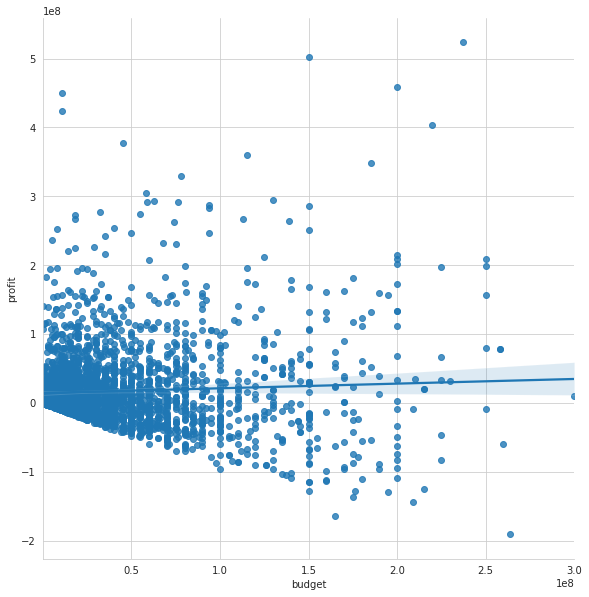

In [79]:
sns.pairplot(data=usa_movies, y_vars='profit', x_vars='budget', kind='reg', height=8)

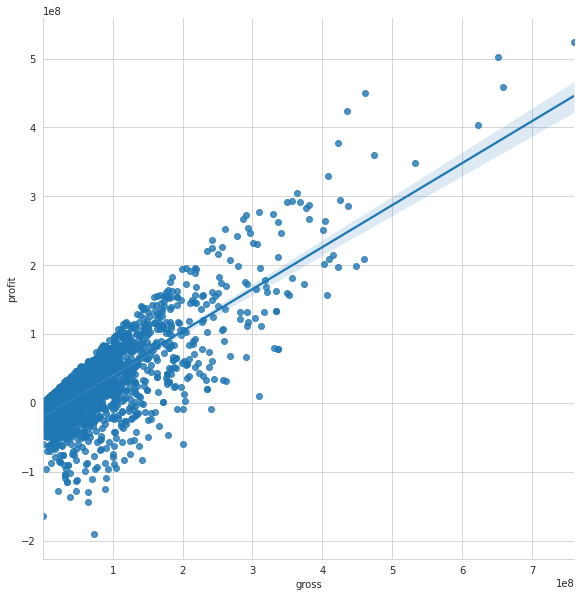

In [80]:
sns.pairplot(data=usa_movies, y_vars='profit', x_vars='gross', kind='reg', height=8)


# Desafio 9 da Thais André
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

Será analisada correlação entre os seguintes atributos: lucro e nota no imdb.

In [81]:
usa_movies.query("budget > 0  and gross > 0").dropna()[['profit', 'imdb_score', 'budget', 'gross']].corr()

,profit,imdb_score,budget,gross
profit,1.000000,0.297647,0.047087,0.798102
imdb_score,0.297647,1.000000,0.069025,0.270734
budget,0.047087,0.069025,1.000000,0.639434
gross,0.798102,0.270734,0.639434,1.000000


O que indica que a nota não necessariamente está envolvida com filmes lucrativos e muito menos relacionado com o quanto é gasto para se fazer o filme.

# AULA 04 - ENEM

In [82]:
enem_dataset = pd.read_csv('https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')
enem_dataset.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,1,2207702.0,Parnaíba,22.0,PI,1,5,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,1,3557105.0,Votuporanga,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,160.0,120.0,120.0,160.0,120.0,680.0,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,1,2506301.0,Guarabira,25.0,PB,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,1,3514403.0,Dracena,35.0,SP,2,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,100.0,120.0,100.0,80.0,0.0,400.0,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,1,3550308.0,São Paulo,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [83]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

enem_dataset.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [84]:
grades_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_dataset[grades_columns].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,nan,nan,nan,nan,nan
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,nan,nan,nan,nan,nan


In [85]:
grades = enem_dataset[grades_columns].dropna()
grades.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [86]:
corr = grades.corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.57,0.60,0.58,0.51
NU_NOTA_CH,0.57,1.00,0.70,0.53,0.50
NU_NOTA_LC,0.60,0.70,1.00,0.57,0.56
NU_NOTA_MT,0.58,0.53,0.57,1.00,0.48
NU_NOTA_REDACAO,0.51,0.50,0.56,0.48,1.00


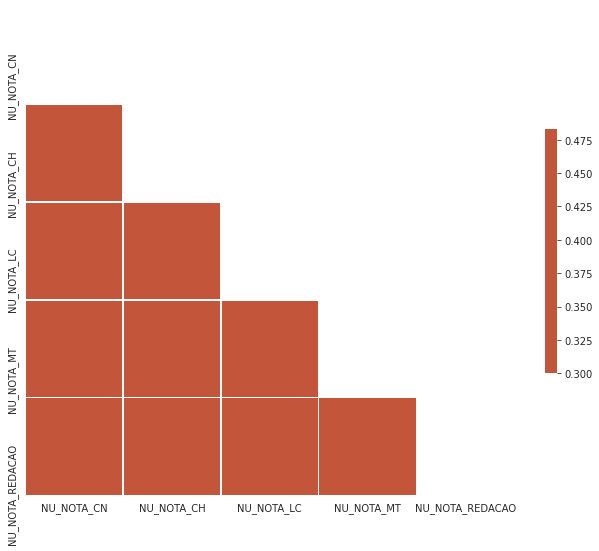

In [87]:
import numpy as np
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

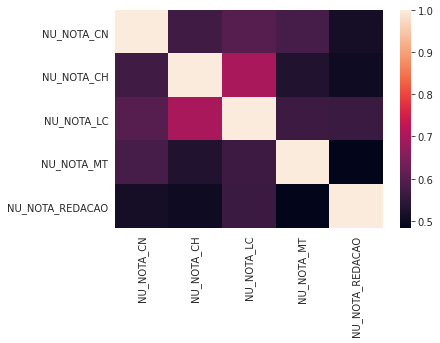

In [88]:
sns.heatmap(corr)

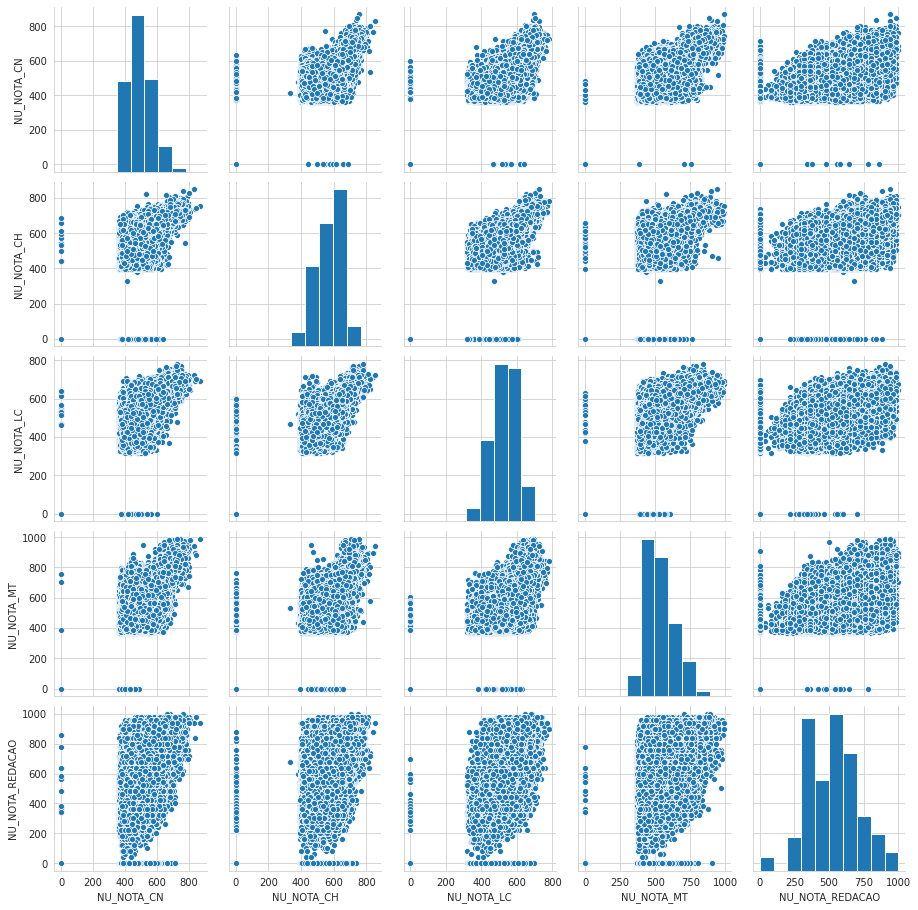

In [89]:
sns.pairplot(grades)

A correlação das notas pode estar sofrendo efeito do TRI, que é calculado em cima da quantidade de acertos.

# Desafio 1 da Thais André
Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [90]:
pd.set_option('max_seq_item', None)
enem_dataset.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
       'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE',
       'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',
       'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_

1a. hipótese: preencher com 0

In [91]:
enem_dataset['NU_NOTA_CN'] = enem_dataset['NU_NOTA_CN'].fillna(0)
enem_dataset['NU_NOTA_CH'] = enem_dataset['NU_NOTA_CH'].fillna(0)
enem_dataset['NU_NOTA_LC'] = enem_dataset['NU_NOTA_LC'].fillna(0)
enem_dataset['NU_NOTA_MT'] = enem_dataset['NU_NOTA_MT'].fillna(0)
enem_dataset['NU_NOTA_REDACAO'] = enem_dataset['NU_NOTA_REDACAO'].fillna(0)
enem_dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00


In [92]:
corr = enem_dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.87,0.87,0.96,0.80
NU_NOTA_CH,0.87,1.00,0.98,0.86,0.86
NU_NOTA_LC,0.87,0.98,1.00,0.86,0.86
NU_NOTA_MT,0.96,0.86,0.86,1.00,0.80
NU_NOTA_REDACAO,0.80,0.86,0.86,0.80,1.00


A inclusão de notas zero, aumentou as correlações que já se mostravam presentes. Mas isso pode ser proveniente de dados enviesados (presença de mesma nota, zero, em mais de uma prova).

2a. hipótese: substituir por média

In [93]:
enem_dataset = pd.read_csv('https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')
enem_dataset['NU_NOTA_CN'] = enem_dataset['NU_NOTA_CN'].fillna(enem_dataset['NU_NOTA_CN'].mean())
enem_dataset['NU_NOTA_CH'] = enem_dataset['NU_NOTA_CH'].fillna(enem_dataset['NU_NOTA_CH'].mean())
enem_dataset['NU_NOTA_LC'] = enem_dataset['NU_NOTA_LC'].fillna(enem_dataset['NU_NOTA_LC'].mean())
enem_dataset['NU_NOTA_MT'] = enem_dataset['NU_NOTA_MT'].fillna(enem_dataset['NU_NOTA_MT'].mean())
enem_dataset['NU_NOTA_REDACAO'] = enem_dataset['NU_NOTA_REDACAO'].fillna(enem_dataset['NU_NOTA_REDACAO'].mean())
enem_dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,493.63,568.31,526.59,535.18,509.13
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,493.63,568.31,526.59,535.18,509.13


In [94]:
corr = enem_dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.54,0.57,0.58,0.49
NU_NOTA_CH,0.54,1.00,0.70,0.50,0.50
NU_NOTA_LC,0.57,0.70,1.00,0.54,0.56
NU_NOTA_MT,0.58,0.50,0.54,1.00,0.46
NU_NOTA_REDACAO,0.49,0.50,0.56,0.46,1.00


Nesta análise, a correlação mantém-se devido ao fato da média não interferir no cálculo das correlações entre as notas.

3a. hipótese: utilizar a mediana

In [95]:
enem_dataset = pd.read_csv('https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')
enem_dataset['NU_NOTA_CN'] = enem_dataset['NU_NOTA_CN'].fillna(enem_dataset['NU_NOTA_CN'].median())
enem_dataset['NU_NOTA_CH'] = enem_dataset['NU_NOTA_CH'].fillna(enem_dataset['NU_NOTA_CH'].median())
enem_dataset['NU_NOTA_LC'] = enem_dataset['NU_NOTA_LC'].fillna(enem_dataset['NU_NOTA_LC'].median())
enem_dataset['NU_NOTA_MT'] = enem_dataset['NU_NOTA_MT'].fillna(enem_dataset['NU_NOTA_MT'].median())
enem_dataset['NU_NOTA_REDACAO'] = enem_dataset['NU_NOTA_REDACAO'].fillna(enem_dataset['NU_NOTA_REDACAO'].mean())
enem_dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,483.50,582.40,531.20,516.50,509.13
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,483.50,582.40,531.20,516.50,509.13


In [96]:
corr = enem_dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.53,0.57,0.58,0.49
NU_NOTA_CH,0.53,1.00,0.70,0.49,0.50
NU_NOTA_LC,0.57,0.70,1.00,0.54,0.56
NU_NOTA_MT,0.58,0.49,0.54,1.00,0.46
NU_NOTA_REDACAO,0.49,0.50,0.56,0.46,1.00


O mesmo processo que a inserção da média em valores faltantes acontece. Portanto, seguirei com a decisão de descartar notas de pessoas que faltaram em pelo menos um dia.

In [97]:
enem_dataset = pd.read_csv('https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')
enem_dataset = enem_dataset.dropna()
enem_dataset.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
6,180009943059,2018,2701308,Cajueiro,27,AL,17.00,F,0.00,3,1,"2,709,400.00",Viçosa,27.00,AL,2,0,2,1.00,0,"27,026,744.00","2,701,308.00",Cajueiro,27.00,AL,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,120.00,120.00,80.00,140.00,100.00,560.00,B,B,A,F,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,B,A
10,180010531930,2018,5002704,Campo Grande,50,MS,18.00,M,0.00,3,1,"5,002,704.00",Campo Grande,50.00,MS,2,0,2,1.00,0,"50,022,997.00","5,002,704.00",Campo Grande,50.00,MS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,EADADCEABAAAADDABDAEAAAADEEACECDBDAEEEEBEDDAC,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,140.00,200.00,160.00,160.00,140.00,800.00,D,C,C,B,4,E,A,C,C,B,A,C,A,B,A,B,A,A,B,B,B,E,B,B,B,B,A
11,180011056962,2018,3509502,Campinas,35,SP,17.00,F,0.00,1,1,"3,509,502.00",Campinas,35.00,SP,2,0,2,1.00,0,"35,018,879.00","3,509,502.00",Campinas,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BDBDCEEEABBBCADDDCBAEEACCEDACCACCABBADDAAEDBC,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,160.00,140.00,120.00,140.00,120.00,680.00,D,D,C,F,2,F,A,B,D,B,A,B,B,B,A,B,A,B,C,A,A,D,B,A,B,B,A
18,180011638661,2018,3203007,Iúna,32,ES,18.00,F,0.00,3,1,"3,204,906.00",São Mateus,32.00,ES,2,0,2,1.00,0,"32,048,920.00","3,203,007.00",Iúna,32.00,ES,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,ACCDBDDBACECBACBACEACBCAECBDCADBCCAADEDBCAABD,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.00,120.00,120.00,100.00,120.00,0.00,460.00,E,E,D,D,4,I,A,B,D,C,B,B,B,B,B,A,A,B,D,A,B,D,A,B,B,B,A
24,180008387261,2018,5003702,Dourados,50,MS,18.00,F,0.00,1,1,"5,003,702.00",Dourados,50.00,MS,2,0,2,1.00,0,"50,016,482.00","5,003,702.00",Dourados,50.00,MS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,AACECCDEBDDCCADABED.CEAAEDDCBCCEBDEBACABDACDD,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,140.00,100.00,600.00,E,E,A,A,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B,B,A


# Desafio 2 do Thiago Gonçalves
A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

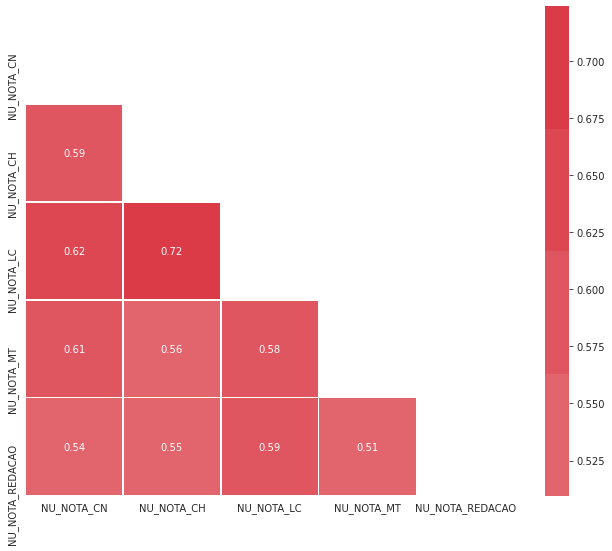

In [98]:
grades = enem_dataset[grades_columns].dropna()
corr = grades.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=27)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot=True)

# Desafio 3 do Paulo Silveira
Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def set_hits(suffix): 
  hits=[]
  answers = enem_dataset[f'TX_RESPOSTAS_{suffix}'].values
  correct_answers = enem_dataset[f'TX_GABARITO_{suffix}'].values
  for test in range(len(answers)):
    sum = 0
    for a, b in zip(answers[test], correct_answers[test]):
      if(a == b): sum += 1
    hits.append(sum)
  enem_dataset[f'NU_ACERTOS_{suffix}'] = pd.Series(hits)

In [100]:
set_hits('CH')
set_hits('CN')
set_hits('LC')
set_hits('MT')
enem_dataset.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,NU_ACERTOS_CH,NU_ACERTOS_CN,NU_ACERTOS_LC,NU_ACERTOS_MT
6,180009943059,2018,2701308,Cajueiro,27,AL,17.00,F,0.00,3,1,"2,709,400.00",Viçosa,27.00,AL,2,0,2,1.00,0,"27,026,744.00","2,701,308.00",Cajueiro,27.00,AL,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,120.00,120.00,80.00,140.00,100.00,560.00,B,B,A,F,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,B,A,6.00,7.00,7.00,7.00
10,180010531930,2018,5002704,Campo Grande,50,MS,18.00,M,0.00,3,1,"5,002,704.00",Campo Grande,50.00,MS,2,0,2,1.00,0,"50,022,997.00","5,002,704.00",Campo Grande,50.00,MS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,140.00,200.00,160.00,160.00,140.00,800.00,D,C,C,B,4,E,A,C,C,B,A,C,A,B,A,B,A,A,B,B,B,E,B,B,B,B,A,7.00,7.00,18.00,8.00
11,180011056962,2018,3509502,Campinas,35,SP,17.00,F,0.00,1,1,"3,509,502.00",Campinas,35.00,SP,2,0,2,1.00,0,"35,018,879.00","3,509,502.00",Campinas,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,160.00,140.00,120.00,140.00,120.00,680.00,D,D,C,F,2,F,A,B,D,B,A,B,B,B,A,B,A,B,C,A,A,D,B,A,B,B,A,14.00,4.00,17.00,8.00
18,180011638661,2018,3203007,Iúna,32,ES,18.00,F,0.00,3,1,"3,204,906.00",São Mateus,32.00,ES,2,0,2,1.00,0,"32,048,920.00","3,203,007.00",Iúna,32.00,ES,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.00,120.00,120.00,100.00,120.00,0.00,460.00,E,E,D,D,4,I,A,B,D,C,B,B,B,B,B,A,A,B,D,A,B,D,A,B,B,B,A,11.00,8.00,8.00,6.00
24,180008387261,2018,5003702,Dourados,50,MS,18.00,F,0.00,1,1,"5,003,702.00",Dourados,50.00,MS,2,0,2,1.00,0,"50,016,482.00","5,003,702.00",Dourados,50.00,MS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,140.00,100.00,600.00,E,E,A,A,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B,B,A,17.00,8.00,26.00,9.00


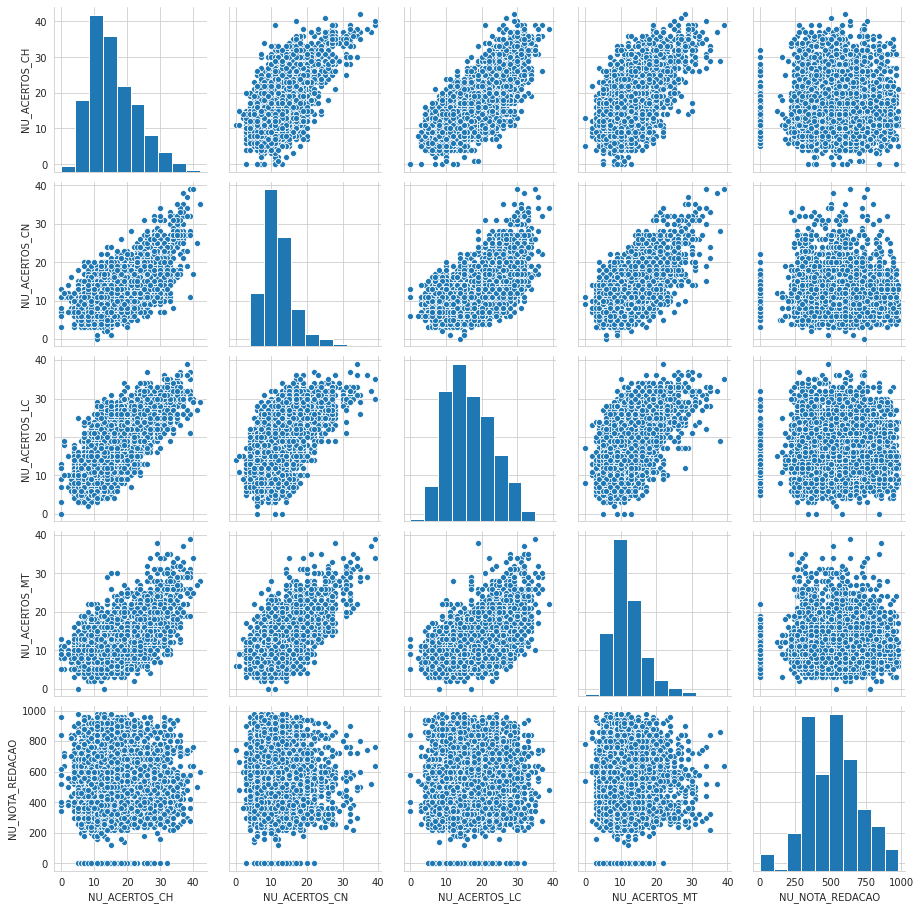

In [101]:
total_correct = enem_dataset[['NU_ACERTOS_CH', 'NU_ACERTOS_CN', 'NU_ACERTOS_LC', 'NU_ACERTOS_MT', 'NU_NOTA_REDACAO']].dropna()
sns.pairplot(total_correct)

In [102]:
total_correct.corr()

,NU_ACERTOS_CH,NU_ACERTOS_CN,NU_ACERTOS_LC,NU_ACERTOS_MT,NU_NOTA_REDACAO
NU_ACERTOS_CH,1.00,0.63,0.75,0.59,0.03
NU_ACERTOS_CN,0.63,1.00,0.57,0.58,0.01
NU_ACERTOS_LC,0.75,0.57,1.00,0.55,0.01
NU_ACERTOS_MT,0.59,0.58,0.55,1.00,0.00
NU_NOTA_REDACAO,0.03,0.01,0.01,0.00,1.00


Podemos concluir que a redação torna-se a menos correlacionada diante da quantidade de acertos e que, praticamente, as relações de correlação observadas diante da nota obtida, são levemente acentuadas, porém, seguem quase o mesmo comportamento, quando se usa o número de acertos.

# Desafio 4 do Guilherme Silveira
Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [103]:
clean_enem = pd.read_csv('https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')

clean_enem['NU_NOTA_CN'] = clean_enem['NU_NOTA_CN'].replace(0., np.NAN)
clean_enem['NU_NOTA_CH'] = clean_enem['NU_NOTA_CH'].replace(0., np.NAN)
clean_enem['NU_NOTA_LC'] = clean_enem['NU_NOTA_LC'].replace(0., np.NAN)
clean_enem['NU_NOTA_MT'] = clean_enem['NU_NOTA_MT'].replace(0., np.NAN)
clean_enem['NU_NOTA_REDACAO'] = clean_enem['NU_NOTA_REDACAO'].replace(0., np.NAN)

clean_enem = clean_enem.dropna(subset=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'])

clean_enem[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


# Desafio 5 do Thiago Gonçalves
Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def correction(student, test_type):
    answers = student.get(f'TX_RESPOSTAS_{test_type}')
    correct_answers = student.get(f'TX_GABARITO_{test_type}')
    
    return pd.Series([int(x==y) for x, y in zip(answers, correct_answers)])

In [105]:
# Analisando a prova azul de Ciências da Natureza
test = enem_dataset.query('CO_PROVA_CN == 447')

matrix = test.apply(correction, test_type='CN', axis=1)
matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
24,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1
37,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137706,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1
137744,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1
137761,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0
137782,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


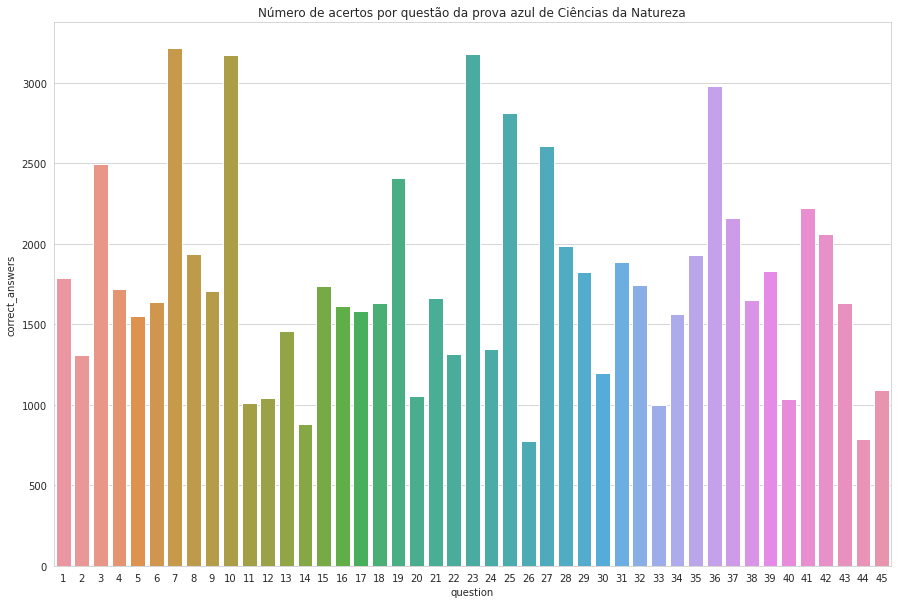

In [106]:
total_hits = pd.DataFrame(matrix.sum())
total_hits.reset_index(inplace=True)
total_hits.columns = ['question', 'correct_answers']
total_hits['question'] = total_hits['question'] + 1

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='question', y='correct_answers', data=total_hits)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza')

plt.show()

# Desafio 6 do Allan Spadini
Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

Será analisado o desempenho geral entre pessoas que fizeram a prova em município diferente do qual reside e pessoas que fizeram a prova em seu município.

In [107]:
enem_dataset.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
       'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE',
       'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',
       'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_

In [0]:
different_cities_dataset = enem_dataset.query("CO_MUNICIPIO_RESIDENCIA != CO_MUNICIPIO_ESC")
same_cities_dataset = enem_dataset.query("CO_MUNICIPIO_RESIDENCIA == CO_MUNICIPIO_ESC")

Primeiramente, ocorrerá análise das notas calculadas pelo TRI

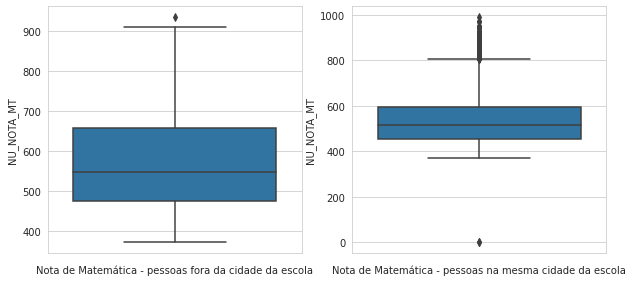

In [125]:
plt.subplots(figsize=(10,10), nrows=1, ncols=2)
plt.subplot(2,2,1)
plt.xlabel('Nota de Matemática - pessoas fora da cidade da escola')
sns.boxplot(data = different_cities_dataset, y='NU_NOTA_MT')
plt.subplot(2,2,2)
plt.xlabel('Nota de Matemática - pessoas na mesma cidade da escola')
sns.boxplot(data = same_cities_dataset, y='NU_NOTA_MT')

plt.show()

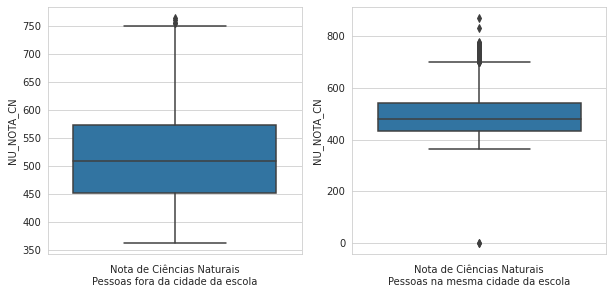

In [127]:
plt.subplots(figsize=(10,10), nrows=1, ncols=2)
plt.subplot(2,2,1)
plt.xlabel('Nota de Ciências Naturais\nPessoas fora da cidade da escola')
sns.boxplot(data = different_cities_dataset, y='NU_NOTA_CN')
plt.subplot(2,2,2)
plt.xlabel('Nota de Ciências Naturais\nPessoas na mesma cidade da escola')
sns.boxplot(data = same_cities_dataset, y='NU_NOTA_CN')

plt.show()

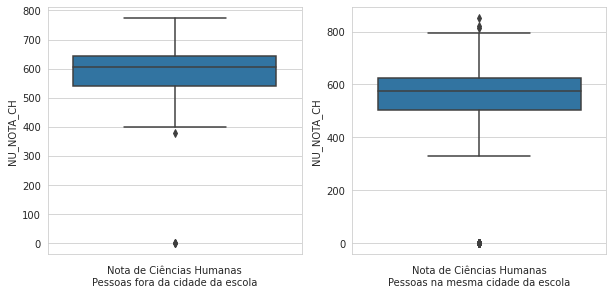

In [128]:
plt.subplots(figsize=(10,10), nrows=1, ncols=2)
plt.subplot(2,2,1)
plt.xlabel('Nota de Ciências Humanas\nPessoas fora da cidade da escola')
sns.boxplot(data = different_cities_dataset, y='NU_NOTA_CH')
plt.subplot(2,2,2)
plt.xlabel('Nota de Ciências Humanas\nPessoas na mesma cidade da escola')
sns.boxplot(data = same_cities_dataset, y='NU_NOTA_CH')

plt.show()

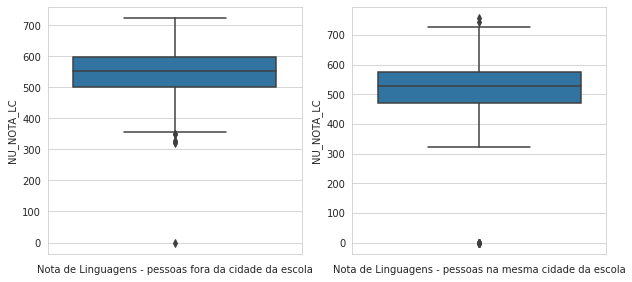

In [129]:
plt.subplots(figsize=(10,10), nrows=1, ncols=2)
plt.subplot(2,2,1)
plt.xlabel('Nota de Linguagens - pessoas fora da cidade da escola')
sns.boxplot(data = different_cities_dataset, y='NU_NOTA_LC')
plt.subplot(2,2,2)
plt.xlabel('Nota de Linguagens - pessoas na mesma cidade da escola')
sns.boxplot(data = same_cities_dataset, y='NU_NOTA_LC')

plt.show()

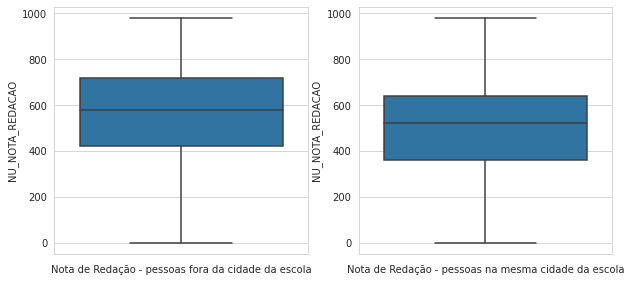

In [130]:
plt.subplots(figsize=(10,10), nrows=1, ncols=2)
plt.subplot(2,2,1)
plt.xlabel('Nota de Redação - pessoas fora da cidade da escola')
sns.boxplot(data = different_cities_dataset, y='NU_NOTA_REDACAO')
plt.subplot(2,2,2)
plt.xlabel('Nota de Redação - pessoas na mesma cidade da escola')
sns.boxplot(data = same_cities_dataset, y='NU_NOTA_REDACAO')

plt.show()

A análise pelos quartis não foi tão conclusiva. É possível observar que a mediana das pessoas que fizeram provas em cidades diferentes de onde residem é um levemente maior ou equivalente a mediana de quem fez a prova na mesma cidade onde reside. No entanto, a distribuição dos outliers é interessante: na maioria das vezes, para o primeiro grupo de pessoas, há outliers abaixo do limite inferior dos quartis, enquanto, que para o segundo grupo, com exceção das notas de redação, os outliers são mais presentes acima do limite superior dos quartis. Em uma prova dessas, isso pode fazer a diferença, dependendo da quantidade de pessoas que se enquadra nessa caracteristica de nota alta. Será analisada apenas as notas de Matemática para observar esse problema com mais cautela.

In [135]:
print('Pessoas com nota acima de 800 em Matemática no ENEM')
print('Pessoas residentes na cidade da escola', len(same_cities_dataset.query("NU_NOTA_MT > 800")))
print('Pessoas não residentes na cidade da escola', len(different_cities_dataset.query("NU_NOTA_MT > 800")))

Pessoas com nota acima de 800 em Matemática no ENEM
Pessoas residentes na cidade da escola 223
Pessoas não residentes na cidade da escola 46


In [136]:
print('Pessoas com nota acima de 750 em Ciências Naturais no ENEM')
print('Pessoas residentes na cidade da escola', len(same_cities_dataset.query("NU_NOTA_CN > 750")))
print('Pessoas não residentes na cidade da escola', len(different_cities_dataset.query("NU_NOTA_CN > 750")))

Pessoas com nota acima de 750 em Ciências Naturais no ENEM
Pessoas residentes na cidade da escola 18
Pessoas não residentes na cidade da escola 5


In [138]:
print('Provas realizadas')
print('Pessoas residentes na cidade da escola', len(same_cities_dataset))
print('Pessoas não residentes na cidade da escola', len(different_cities_dataset))

Provas realizadas
Pessoas residentes na cidade da escola 24449
Pessoas não residentes na cidade da escola 2119


É possível analisar que não é possível concluir que pessoas que fazem o ENEM em cidades diferentes de onde residem obtém pior desempenho, por conta de proporções parecidas nas notas obtidas.